In [133]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# read and save csv of tobacco statistics
smoker = pd.read_csv('adult-tobacco-prevalence.csv')
print(smoker)

    YEAR                          DEMOGRAPHIC PERCENT    SE LOWER95 UPPER95
0   2016                                 Male    22.7   1.1    20.5    24.9
1   2016                               Female    10.5   0.9     8.8    12.1
2   2016  Non-Hispanic African American/Black    16.8   2.5      12    21.6
3   2016         Non-Hispanic American Indian    45.7  15.9    14.6    76.9
4   2016  Non-Hispanic Asian/Pacific Islander     8.5   1.3     5.9    11.1
5   2016                   Non-Hispanic Asian     8.7   1.4       6    11.4
6   2016        Non-Hispanic Pacific Islander       *     *       *       *
7   2016                   Non-Hispanic White    17.8     1    15.8    19.8
8   2016                             Hispanic    15.7   1.3    13.1    18.2
9   2016                                LGBTQ    27.7   5.1    17.8    37.7
10  2016                           Low Income    22.5   1.7    19.2    25.8
11  2016                    Rural Communities       *     *       *       *
12  2016    

In [137]:
# make column names more usable
smoker.rename(columns = lambda x: x.lower(), inplace = True)

# remove rows that are missing data
smoker = smoker.drop(smoker[smoker.percent == '*'].index)

# change datatype of percent from object to float
smoker['percent'] = smoker['percent'].astype(float)
smoker['year'] = smoker['year'].astype(str)
print(smoker.dtypes)

year            object
demographic     object
percent        float64
se              object
lower95         object
upper95         object
dtype: object


In [87]:
# save data of only lines containing gender
smoker_gender = smoker[smoker.demographic.isin(["Male", "Female"])]
print(smoker_gender)

    year demographic  percent   se lower95 upper95
0   2016        Male     22.7  1.1    20.5    24.9
1   2016      Female     10.5  0.9     8.8    12.1
13  2017        Male     20.7  1.4    17.9    23.5
14  2017      Female      8.7  0.7     7.4      10
26  2018        Male     19.2  1.2    16.9    21.4
27  2018      Female      9.3    1     7.4    11.2
39  2019        Male     17.8  1.4      15    20.6
40  2019      Female      8.5  0.7     7.2     9.9


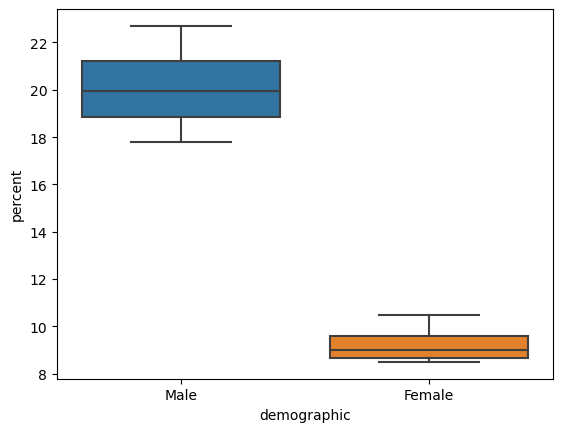

In [89]:
# create a boxplot showing male vs female tobacco use over all years of study
sns.boxplot(data = smoker_gender, x = 'demographic', y = 'percent')
plt.show()

In [91]:
# save data of demographics by ethnicity
smoker_eth = smoker[smoker.demographic.isin(["Non-Hispanic African American/Black", "Non-Hispanic American Indian", "Non-Hispanic Asian/Pacific Islander", "Non-Hispanic Asian", "Non-Hispanic White", "Hispanic"])]
print(smoker_eth)

    year                          demographic  percent    se lower95 upper95
2   2016  Non-Hispanic African American/Black     16.8   2.5      12    21.6
3   2016         Non-Hispanic American Indian     45.7  15.9    14.6    76.9
4   2016  Non-Hispanic Asian/Pacific Islander      8.5   1.3     5.9    11.1
5   2016                   Non-Hispanic Asian      8.7   1.4       6    11.4
7   2016                   Non-Hispanic White     17.8     1    15.8    19.8
8   2016                             Hispanic     15.7   1.3    13.1    18.2
15  2017  Non-Hispanic African American/Black     12.6   2.2     8.3    16.9
16  2017         Non-Hispanic American Indian     20.9     8     5.2    36.7
17  2017  Non-Hispanic Asian/Pacific Islander     13.3   2.9     7.7    18.9
18  2017                   Non-Hispanic Asian     13.2     3     7.4      19
20  2017                   Non-Hispanic White     15.7   1.2    13.4      18
21  2017                             Hispanic     13.6   1.4    10.8    16.4

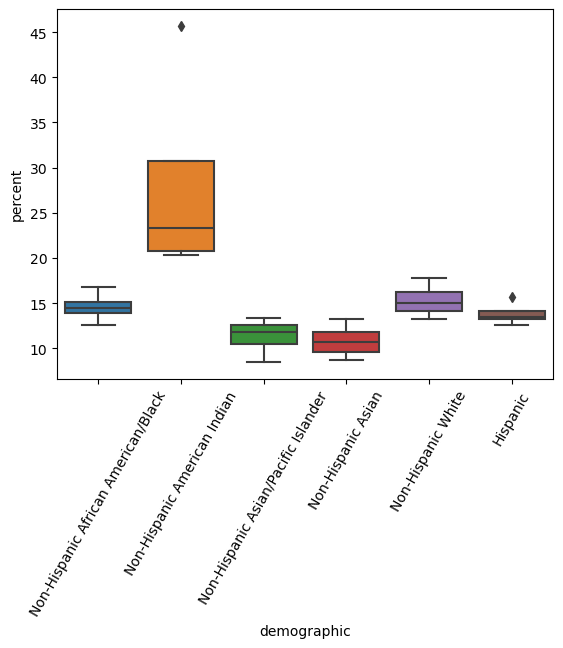

In [93]:
# clear previous plot
plt.clf()

# create boxplot broken down by ethnicity over all years of study
smoke_by_eth = sns.boxplot(data = smoker_eth, x = 'demographic', y = 'percent')

#rotate labels to make x-axis readable
smoke_by_eth.set_xticklabels(smoke_by_eth.get_xticklabels(), rotation=60)

plt.show()

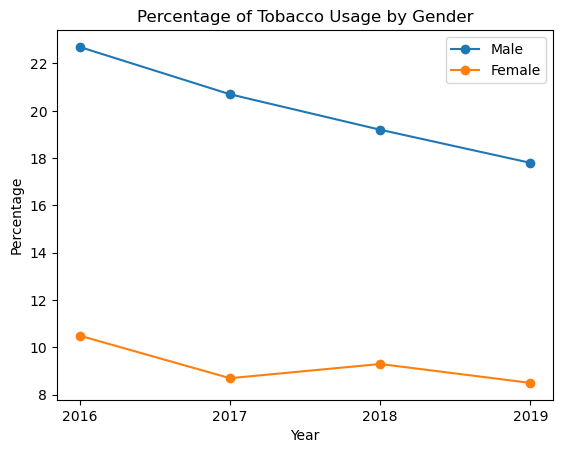

In [101]:
# clear previous plot
plt.clf()

# create lineplot showing change in percent between gender over the years of study
plt.plot(smoker_gender.year[smoker_gender.demographic == 'Male'], smoker_gender.percent[smoker_gender.demographic == 'Male'], '-o', label="Male")
plt.plot(smoker_gender.year[smoker_gender.demographic == 'Female'], smoker_gender.percent[smoker_gender.demographic == 'Female'], '-o', label="Female")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Percentage of Tobacco Usage by Gender")
plt.legend()

plt.show()